### Basic imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from copy import deepcopy
from tqdm import tqdm_notebook as tqdm

In [ ]:
pd.set_option()

In [7]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

TOP = 10
size_of_rest = 0
i = 0
for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1]):
    if i < TOP:
        print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))
    else:
        size_of_rest += size
    i += 1
        
print("{:>30}: {:>8}".format('Size of rest', sizeof_fmt(size_of_rest)))

                            _i:  766.0 B
                           _i6:  766.0 B
                           _i7:  765.0 B
                          _iii:  759.0 B
                           _i4:  759.0 B
                           _ii:  755.0 B
                           _i5:  755.0 B
                           _i2:  587.0 B
                             _:  408.0 B
                            _3:  408.0 B
                  Size of rest:  2.6 KiB


## Read data

In [8]:
import ast

In [193]:
dir_path = '../data/tweets_maga/'
data_original = pd.read_csv(dir_path + 'data_merged.csv', index_col=0)
# convert tokens column from string to list
data_original['tokens'] = data_original.tokens.apply(lambda l: ast.literal_eval(l))
data_original

,author_name,created_at,id,text,tokens
0,RealPatriot,2019-10-01 00:37:21,1178831229963116544,@realDonaldTrump I’m confused. Is this a new “...,"[confus, new, greatest, old, scandal, hard, fo..."
1,Teresa murray⭐⭐⭐ CIA #fakewistleblower 😡,2019-10-01 00:37:20,1178831224191832067,@realDonaldTrump @Hyundai @Kia @Aptiv I'm not ...,"[yet, tire, win, sir]"
2,GOPKnowsBest,2019-10-01 00:37:17,1178831213571629057,@WA_Silenced_Maj @realDonaldTrump You are the ...,"[true, patriot, antifa, physic, assault, way, ..."
3,Peter Dunbar,2019-10-01 00:37:15,1178831204151226368,It is amazing to watch @RudyGiuliani throw his...,"[amaz, watch, throw, reput, toilet, guess, som..."
4,AtlanticCity Deplorable,2019-10-01 00:37:04,1178831160635514880,@w_terrence @realDonaldTrump WHOOOOOHOOOOO! I’...,"[whooohooo, excit]"
5,Michael O'Grady,2019-10-01 00:36:58,1178831134156820480,#Trump LIED ABOUT WIKILEAKS in #MuellerReport\...,"[lie, wikileak, grand-juri, redact, special, c..."
6,Lynn McCracken,2019-10-01 00:36:43,1178831070067924992,Never polled and don't know anyone that has. \...,"[never, poll, know, anyon]"
7,U R Busted,2019-10-01 00:36:41,1178831062304202754,#GettumGirl\n\n#Maga needs to get off their as...,"[need, get, ass, put, foot, dem, antifa, thing..."
8,McQ,2019-10-01 00:36:39,1178831051881418757,@realDonaldTrump Beautiful!\n#KAG\n#MAGA,[beauti]
9,SJ 🌟🌟🌟,2019-10-01 00:36:27,1178831004485636096,#RedOctober Did #Q mean this October? \nMaybe ...,"[mean, octob, mayb, onto, someth, regard, horr..."


## Post cleaning

In [194]:
import gensim

In [258]:
data = deepcopy(data_original)

t_dict = gensim.corpora.Dictionary(data.tokens)
print('Initial unique tokens:', len(t_dict.keys()))

# drop tokens occuring in less than <no_below> tweets
# drop tokens occuring in more than <no_above> portion of the data
# keep only the <keep_n> most frequent tokens
t_dict.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
remaining_tokens = set(t_dict.token2id.keys())
data['tokens'] = data.tokens.apply(lambda tokens: [t for t in tokens if t in remaining_tokens])

print('Remaining unique tokens:', len(remaining_tokens))

Initial unique tokens: 20819
Remaining unique tokens: 3203


In [259]:
# drop tweets with <= 1 words left
data.drop(index=data[data.tokens.str.len() <= 1].index, inplace=True)

print('Original / remaining #tweets:')
print(len(data_original), '/', len(data))

Original / remaining #tweets:
44783 / 43219


## Network based approach

### Build network

In [260]:
import networkx as nx
from networkx.algorithms.community import *
import graph_tool as gt
from sbmtm import sbmtm
import itertools

#### Naive (word-word)

In [261]:
G = nx.Graph()

for token_list in tqdm(data.tokens):
    
    for edge in itertools.combinations(token_list, 2):
        w = G.get_edge_data(*edge, default={'weight':0})['weight'] + 1
        G.add_edge(*edge, weight=w)

G = nx.convert_node_labels_to_integers(G, label_attribute='label')
print(nx.info(G))
deg_med = np.median([deg for node, deg in G.degree(weight='weight')])
print(f'Median degree: {deg_med}')

KeyboardInterrupt: 

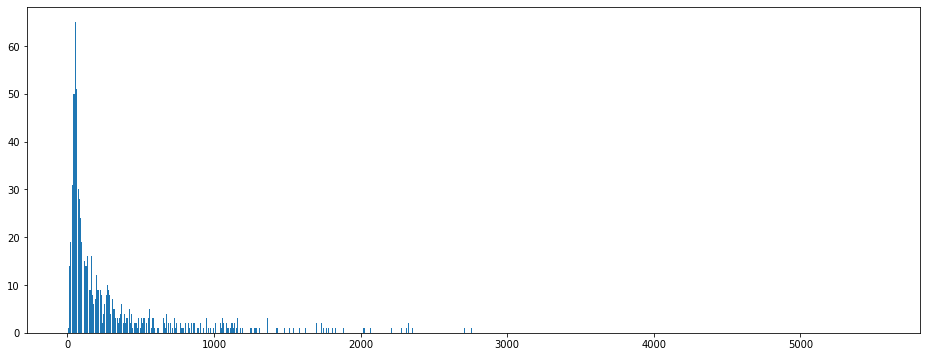

In [17]:
hist = nx.degree_histogram(G)

plt.figure(figsize=(16,6))
plt.bar(range(len(hist)), hist)

plt.show()

#### Proper (word-tweet)

In [271]:
filters = (data.tokens.str.len() >= 15)
print(f'Number of tweets: {len(data[filters])}')
print(f'Number of tokens: {data[filters].tokens.str.len().sum()}')

Number of tweets: 9203
Number of tokens: 171388


In [272]:
from sbmtm import sbmtm
import graph_tool.all as gt

texts = list(data[filters].tokens)
titles = list(data[filters].index)

## we create an instance of the sbmtm-class
hsbm_model = sbmtm()

## we have to create the word-document network from the corpus
hsbm_model.make_graph(texts,documents=titles)

## we can also skip the previous step by saving/loading a graph
hsbm_model.save_graph(filename = dir_path + 'tmp.xml.gz')
# model.load_graph(filename = dir_path + 'tmp.xml.gz')

### Find communities

#### hSBM (hierarchical Stochastic Bolc Model)

In [273]:
## fit the model
gt.seed_rng(42)
hsbm_model.fit()

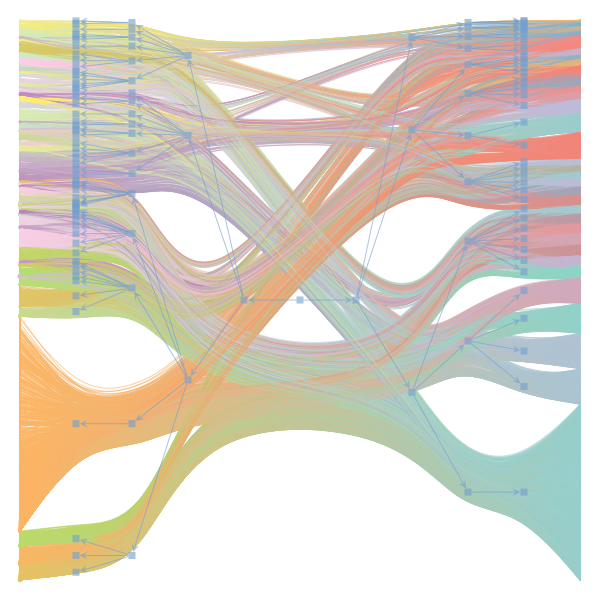

In [274]:
hsbm_model.plot(nedges=10000)

In [277]:
hsbm_model.topics(l=2,n=15)

{0: [('trump', 0.02012806647630459),
  ('presid', 0.011079384098282852),
  ('get', 0.011024920833754776),
  ('peopl', 0.009702241552358649),
  ('like', 0.008644098127241746),
  ('know', 0.0074848086394298475),
  ('say', 0.007438125841262925),
  ('make', 0.0073914430430960035),
  ('american', 0.006737883868759093),
  ('democrat', 0.006232153555284104),
  ('want', 0.006169909824394874),
  ('one', 0.006099885627144491),
  ('would', 0.006053202828977569),
  ('america', 0.005936495833560263),
  ('time', 0.005827569304504112)],
 1: [('biden', 0.02267995240928019),
  ('ukrain', 0.022233789411064842),
  ('obama', 0.022010707911957167),
  ('investig', 0.021713265913146935),
  ('million', 0.01710291493158834),
  ('schiff', 0.016210588935157644),
  ('whistleblow', 0.015987507436049972),
  ('hillari', 0.015838786436644853),
  ('foreign', 0.015392623438429506),
  ('russia', 0.014723378941106485),
  ('campaign', 0.014425936942296252),
  ('clinton', 0.012566924449732302),
  ('pelosi', 0.0111540749553

#### Greedy modularity

In [45]:
comms = list(greedy_modularity_communities(G))

In [46]:
comms

[frozenset({32768,
            1,
            3,
            32771,
            7,
            32775,
            9,
            11,
            32780,
            14,
            32782,
            16,
            'podesta',
            19,
            32787,
            32789,
            22,
            24,
            32793,
            26,
            32795,
            29,
            32797,
            32801,
            34,
            35,
            36,
            32809,
            'fill',
            32814,
            47,
            32816,
            'jeer',
            50,
            51,
            32817,
            54,
            59,
            32827,
            32828,
            62,
            32830,
            32831,
            'diaper',
            72,
            32842,
            'classi',
            'nit',
            32846,
            32848,
            'theyd',
            82,
            83,
            32850,
            86,
            32856,
 

#### Girwan-Newman

In [113]:
comms_gn = girvan_newman(G)

In [114]:
k = 5
comms_limited = itertools.takewhile(lambda c: len(c) <= k, comms_gn)
for communities in comms_limited:
    print(tuple(sorted(c) for c in communities))

KeyboardInterrupt: 

#### K-Clique

In [ ]:
k = 4
c = list(k_clique_communities(G, k))
c

## LDA (Latent Dirichlet Allocation)

In [290]:
filters = (data.tokens.str.len() >= 15)
print(f'Number of tweets: {len(data[filters])}')
print(f'Number of words: {data[filters].tokens.str.len().sum()}')

Number of tweets: 9203
Number of words: 171388


In [292]:
bow_corpus = data[filters].tokens.apply(t_dict.doc2bow)

In [357]:
lda_model = gensim.models.LdaMulticore(
    corpus=bow_corpus,
    num_topics=18,
    passes=5,
    id2word=t_dict,
    workers=3
)

In [358]:
lda_model.show_topics(num_topics=-1, num_words=15, formatted=False)

[(0,
  [('trump', 0.024873363),
   ('presid', 0.019642286),
   ('corrupt', 0.016324041),
   ('democrat', 0.009984303),
   ('expos', 0.008634948),
   ('see', 0.008548651),
   ('cia', 0.007948752),
   ('joe', 0.007691355),
   ('time', 0.007486449),
   ('come', 0.007483734),
   ('say', 0.0074086348),
   ('want', 0.006822979),
   ('think', 0.0066166893),
   ('year', 0.0065680803),
   ('polit', 0.006549096)]),
 (1,
  [('trump', 0.023940215),
   ('ukrain', 0.016336953),
   ('biden', 0.015642311),
   ('peopl', 0.011894201),
   ('like', 0.009235579),
   ('investig', 0.008973433),
   ('make', 0.008616485),
   ('corrupt', 0.008577503),
   ('get', 0.0069078077),
   ('democrat', 0.006493128),
   ('america', 0.006047673),
   ('russia', 0.005922075),
   ('son', 0.0058010234),
   ('hunter', 0.0057943934),
   ('think', 0.005763725)]),
 (2,
  [('trump', 0.017624052),
   ('kurd', 0.011755103),
   ('america', 0.0099754585),
   ('isi', 0.00993656),
   ('alli', 0.009613267),
   ('fight', 0.009015307),
   (

In [296]:
lda_model.get_document_topics(bow_corpus.iloc[0])

[(0, 0.22344473), (1, 0.53605175), (2, 0.24050356)]

## Results, comparison

In [349]:
def get_hsbm_topics_dict(hsbm_model, level=0, num_words=100):
    topics = hsbm_model.topics(l=level,n=num_words)
    freq_sum = {topic : sum([freq for (word, freq) in word_freq]) 
                for (topic, word_freq) in topics.items() }
    return {topic : {word : freq/freq_sum[topic] for (word, freq) in word_freq} 
                for (topic, word_freq) in topics.items() }

def get_lda_topics_dict(lda_model, num_topics=-1, num_words=100):
    topics = lda_model.show_topics(num_topics=num_topics, num_words=num_words, formatted=False)
    freq_sum = {topic : sum([freq for (word, freq) in word_freq]) 
                for (topic, word_freq) in topics }
    return {topic : {word : freq/freq_sum[topic] for (word, freq) in word_freq} 
                for (topic, word_freq) in topics}

def get_topic_score(token_list, topics_dict):
    return [sum([topics_dict[topic].get(t, 0) for t in token_list]) / len(token_list)
            for topic in topics_dict]

def get_mixture_custom(doc_list, topics_dict):
    doc_scores = data.loc[doc_list].tokens.apply(get_topic_score, args=(topics_dict,))
    return pd.DataFrame(index=doc_scores.index,
                        columns=topics_dict.keys(), 
                        data=np.stack(doc_scores.values) / (np.stack(doc_scores.values).sum(axis=1).reshape(-1,1) + np.finfo(float).eps)
                       )

def get_mixture_hsbm(doc_list, hsbm_model, level=2):
    doc2id = {doc : i for (i, doc) in enumerate(hsbm_model.documents)}
    return pd.DataFrame(index=doc_list, 
                        columns=hsbm_model.topics(l=level).keys(),
                        data=[[ratio for topic, ratio in topic_dist] 
                              for topic_dist in map(lambda doc: hsbm_model.topicdist(doc2id[str(doc)], l=level), doc_list)]
                         )

def get_mixture_lda(doc_list, lda_model, bow_corpus):
    return pd.DataFrame(index=doc_list, 
                        columns=range(lda_model.get_topics().shape[0]),
                        data=[[ratio for topic, ratio in topic_dist] 
                              for topic_dist in map(lambda doc: lda_model.get_document_topics(bow_corpus[doc]), doc_list)]
                         )
    
def print_topic_examples(mixture_df, n_examples=5):

    for topic in mixture_df.columns: 
        print('-'*100)
        print('-'*40 + f' TOPIC: {topic} ' + '-'*40)
        print('-'*100 + '\n\n')

        top_score_ids = mixture_df.sort_values(by=topic, ascending=False).iloc[:n_examples, topic].index
        for text in data.text[top_score_ids]:
            print(text)
            print('-'*100 + '\n')

In [356]:
print_topic_examples(get_mixture_hsbm(data[filters].index, hsbm_model, level=1))

----------------------------------------------------------------------------------------------------
---------------------------------------- TOPIC: 0 ----------------------------------------
----------------------------------------------------------------------------------------------------


She tells a different “STORY” today than she did YESTERDAY on everything. The ONLY thing she SUBSTANTIATES is that she’s a BOLD FACED LIAR and is WILLING to double down thinking we’re dumb 💁‍♀️ like @BillClinton #MAGA #MAGA2020 #KAG #BUILDTHEWALL #IMMIGRATIONREFORM #GOP https://t.co/TpX12AYBta
----------------------------------------------------------------------------------------------------

It is bad enough that so many people believe things without any evidence. What is worse is that some people have no conception of evidence and regard facts as just someone else's opinion.-Thomas Sowell 

#KAG #MAGA #quotes @realDonaldTrump https://t.co/9usxPnoXnB
--------------------------------------------

In [355]:
print_topic_examples(get_mixture_lda(data[filters].index, lda_model, bow_corpus))

----------------------------------------------------------------------------------------------------
---------------------------------------- TOPIC: 0 ----------------------------------------
----------------------------------------------------------------------------------------------------


@RepAdamSchiff SEND ADAM SCHIFF TO JAIL NOW SEND ADAM SCHIFF TO JAIL NOW SEND ADAM SCHIFF TO JAIL NOW SEND ADAM SCHIFF TO JAIL NOW SEND ADAM SCHIFF TO JAIL NOW SEND ADAM SCHIFF TO JAIL NOW SEND ADAM SCHIFF TO JAIL NOW SEND ADAM SCHIFF TO JAIL NOW SEND ADAM SCHIFF TO JAIL NOW #AmberGuyger #MAGA https://t.co/42yTbqQKpJ
----------------------------------------------------------------------------------------------------

US economy recently downgraded in rank to 3rd. Sad. #MAGA workers lives not getting better. Sad. Manufacturing failing. Sad. Record deficit increases. Sad. Many econ factors showing recession coming. Sad. Tariffs costing consumers millions. Sad. Many farmers going bankrupt. Sad. http

In [215]:
print_topic_examples(get_mixture_custom())

----------------------------------------------------------------------------------------------------
---------------------------------------- TOPIC: 0 ----------------------------------------
----------------------------------------------------------------------------------------------------


Trump Trump 2016.@realDonaldTrump Trump @2020 trump  Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump Trump #MAGA
----------------------------------------------------------------------------------------------------

@ChatByCC @realDonaldTrump @BreitbartNews Me too

I stand with President Trump!

I stand with President Trump!

I stand with President Trump!

I stand with President Trump!

I stand with President Trump!

I stand with President Trump!

I stand with President Trump!

I stand with President Trump!
🇺🇸🇺🇸⚖️🗽🇺🇸🇺🇸
#KAG #MAGA
--------------------------